# Language-agnostic modeling of quality of Wikipedia articles

This notebook provides a tutorial for how to explore the dataset from language-agnostic feature values and quality scores of Wikipedia articles. It has 3 stages:
1. Accessing and extending a sample of the dataset
2. Visualizing features values and qualities scores over time
3. Future Analyses

## 1. Accessing to the data

The dataset of language-agnostic feature values and quality scores of Wikipedia articles available on [Zenodo](https://zenodo.org/records/10495081) is too large to handle with a Jupyter notebook. For that reason, we have prepared a sample with the revisions of English Wikipedia articles maintained by [WikiProject Climate change](https://en.wikipedia.org/wiki/Wikipedia:WikiProject_Climate_change) with the following columns:
- wiki_db: Wikipedia language edition ('enwiki' in this sample).
- page_id: Id of the page (in the corresponding Wikipedia language edition).
- revision_id: Id of the revision (in the corresponding Wikipedia language edition).
- page_length:  Number of bytes of the revision.
- num_refs:  Number of references of the revision.
- num_wikilinks: Number of wikilinks of the revision.
- num_categories: Number of categories of the revision.
- num_media: Number of media files of the revision.
- num_headings: Number of sections of the revision.
- item_id: Id of the page in Wikidata.
- pred_qual: Predicted quality score between 0 and 1.

In [25]:
# TODO: add other libraries here as necessary
!pip install mwviews 
from mwviews.api import PageviewsClient
import pandas as pd
from datetime import datetime, timedelta
import pytz

In [26]:
# Read the zipped CSV
df_revisions = pd.read_csv('https://public-paws.wmcloud.org/User:Pablo%20(WMF)/outreachy/round28/features_scores_climatechange_2022.csv.zip')
df_revisions

,wiki_db,page_id,revision_id,revision_timestamp,page_length,num_refs,num_wikilinks,num_categories,num_media,num_headings,item_id,pred_qual
0,enwiki,348869,366664976,2010-06-07T22:45:20Z,10464,11,66,4,2,7,Q1137345,0.557963
1,enwiki,348869,251114181,2008-11-11T15:34:55Z,4049,0,41,4,2,3,Q1137345,0.397999
2,enwiki,348869,712041311,2016-03-26T15:07:18Z,20701,28,84,4,2,10,Q1137345,0.696191
3,enwiki,348869,341876534,2010-02-04T12:02:16Z,10100,11,61,4,2,7,Q1137345,0.554477
4,enwiki,348869,519730962,2012-10-25T09:56:12Z,17858,21,93,4,2,9,Q1137345,0.654836
...,...,...,...,...,...,...,...,...,...,...,...,...
1456207,enwiki,66790245,1069533455,2022-02-02T19:41:20Z,42178,81,118,4,2,14,Q105549782,0.797312
1456208,enwiki,66790245,1007245703,2021-02-17T04:02:02Z,744,1,2,0,0,0,Q105549782,0.139069
1456209,enwiki,66790245,1041821278,2021-09-01T18:18:01Z,5728,9,19,4,0,5,Q105549782,0.401310
1456210,enwiki,66790245,1055285832,2021-11-15T00:29:52Z,34922,80,115,4,1,14,Q105549782,0.770978


In [27]:
# As mentioned above, pages are English Wikipedia articles maintained by WikiProject Climate change. 
# The id and title of these pages, together with their quality class and importance class can be extracted with the following Quarry query:
# https://quarry.wmcloud.org/query/52210
df_pages = pd.read_csv('https://quarry.wmcloud.org/query/52210/result/latest/0/csv')
df_pages

,page_id,page_title,quality_class,importance_class
0,39,Albedo,B,High
1,627,Agriculture,GA,Low
2,903,Arable_land,C,Low
3,1365,Ammonia,B,Low
4,3201,Attribution_of_recent_climate_change,B,High
...,...,...,...,...
3812,73428116,Anne_Therese_Gennari,Start,Low
3813,73464356,Christopher_Magadza,C,Low
3814,73540566,Britney_Schmidt,C,Low
3815,73569052,Rainwater_harvesting_in_the_Sahel,C,Low


In [28]:
# Both dataframes can be merged to extend metadata of the revisions samples
df_total = df_revisions.merge(df_pages, on='page_id')
df_total

,wiki_db,page_id,revision_id,revision_timestamp,page_length,num_refs,num_wikilinks,num_categories,num_media,num_headings,item_id,pred_qual,page_title,quality_class,importance_class
0,enwiki,348869,366664976,2010-06-07T22:45:20Z,10464,11,66,4,2,7,Q1137345,0.557963,North_Atlantic_oscillation,Start,Unknown
1,enwiki,348869,251114181,2008-11-11T15:34:55Z,4049,0,41,4,2,3,Q1137345,0.397999,North_Atlantic_oscillation,Start,Unknown
2,enwiki,348869,712041311,2016-03-26T15:07:18Z,20701,28,84,4,2,10,Q1137345,0.696191,North_Atlantic_oscillation,Start,Unknown
3,enwiki,348869,341876534,2010-02-04T12:02:16Z,10100,11,61,4,2,7,Q1137345,0.554477,North_Atlantic_oscillation,Start,Unknown
4,enwiki,348869,519730962,2012-10-25T09:56:12Z,17858,21,93,4,2,9,Q1137345,0.654836,North_Atlantic_oscillation,Start,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426996,enwiki,66790245,1069533455,2022-02-02T19:41:20Z,42178,81,118,4,2,14,Q105549782,0.797312,Build_Back_Better_Plan,C,Mid
1426997,enwiki,66790245,1007245703,2021-02-17T04:02:02Z,744,1,2,0,0,0,Q105549782,0.139069,Build_Back_Better_Plan,C,Mid
1426998,enwiki,66790245,1041821278,2021-09-01T18:18:01Z,5728,9,19,4,0,5,Q105549782,0.401310,Build_Back_Better_Plan,C,Mid
1426999,enwiki,66790245,1055285832,2021-11-15T00:29:52Z,34922,80,115,4,1,14,Q105549782,0.770978,Build_Back_Better_Plan,C,Mid


In [29]:
df_total.to_csv('df_total.csv', index=False)


In [30]:
# TODO: For any article, you need to use the API to gather pageviews count
# in the time period each revision was made.
# mwviews documentation: https://github.com/mediawiki-utilities/python-mwviews
# user_agent helps identify the request if there's an issue and is best practice
tutorial_label = 'PAWS Language-agnostic quality modeling tutorial (mwapi)'
# NOTE: it is best practice to include a contact email in user agents
# generally this is private information though so do not change it to yours
# if you are working in the PAWS environment or adding to a Github repo
# for Outreachy, you can leave this as Pablo's email or switch it to your Mediawiki username
# e.g., Pablo (WMF) for https://www.mediawiki.org/wiki/User:Pablo_(WMF)
contact_email = 'paragon@wikimedia.org'
p = PageviewsClient(user_agent=f'<{contact_email}> {tutorial_label}')
# See below an example for monthly pageviews of two given articles in 2022
p.article_views('en.wikipedia', ['Albedo', 'Agriculture'], granularity='monthly', start='20220101', end='20221231')

defaultdict(dict,
            {datetime.datetime(2022, 6, 1, 0, 0): {'Albedo': 26119,
              'Agriculture': 99250},
             datetime.datetime(2022, 1, 1, 0, 0): {'Albedo': 33276,
              'Agriculture': 129619},
             datetime.datetime(2022, 8, 1, 0, 0): {'Albedo': 27766,
              'Agriculture': 112030},
             datetime.datetime(2022, 7, 1, 0, 0): {'Albedo': 30038,
              'Agriculture': 93480},
             datetime.datetime(2022, 9, 1, 0, 0): {'Albedo': 34701,
              'Agriculture': 149693},
             datetime.datetime(2022, 11, 1, 0, 0): {'Albedo': 35815,
              'Agriculture': 147939},
             datetime.datetime(2022, 12, 1, 0, 0): {'Albedo': 27722,
              'Agriculture': 114116},
             datetime.datetime(2022, 4, 1, 0, 0): {'Albedo': 35430,
              'Agriculture': 126763},
             datetime.datetime(2022, 3, 1, 0, 0): {'Albedo': 33142,
              'Agriculture': 163182},
             datetime.dateti

In [31]:
p.article_views('en.wikipedia', ['Climate_change'], granularity='monthly', start='20150701', end='20221231')

defaultdict(dict,
            {datetime.datetime(2020, 2, 1, 0, 0): {'Climate_change': 37871},
             datetime.datetime(2018, 10, 1, 0, 0): {'Climate_change': 149526},
             datetime.datetime(2022, 8, 1, 0, 0): {'Climate_change': 162707},
             datetime.datetime(2021, 9, 1, 0, 0): {'Climate_change': 212201},
             datetime.datetime(2021, 4, 1, 0, 0): {'Climate_change': 190311},
             datetime.datetime(2016, 11, 1, 0, 0): {'Climate_change': 159422},
             datetime.datetime(2018, 9, 1, 0, 0): {'Climate_change': 116058},
             datetime.datetime(2015, 9, 1, 0, 0): {'Climate_change': 125452},
             datetime.datetime(2020, 4, 1, 0, 0): {'Climate_change': 29069},
             datetime.datetime(2019, 10, 1, 0, 0): {'Climate_change': 216308},
             datetime.datetime(2021, 11, 1, 0, 0): {'Climate_change': 208119},
             datetime.datetime(2018, 7, 1, 0, 0): {'Climate_change': 107077},
             datetime.datetime(2022, 1, 1, 0

In [ ]:
# The pageviews from July 2015
# There are still some errors I haven't solved, because the results are all 0.Thank you for the feedback.

df_total['revision_timestamp'] = pd.to_datetime(df_total['revision_timestamp'], utc=True)
# Filter rows for the article "Climate_change"
climate_change_revisions = df_total[df_total['page_title'] == 'Climate_change']

# Sort the revisions by timestamp
climate_change_revisions = climate_change_revisions.sort_values(by='revision_timestamp').reset_index(drop=True)


start_date = datetime(2015, 7, 1, tzinfo=pytz.utc)
climate_change_revisions = climate_change_revisions[climate_change_revisions['revision_timestamp'] >= start_date]


# Function to format the timestamp
#def format_timestamp(timestamp):
   # try:
    #    return datetime.strptime(timestamp, '%Y-%m-%dT%H:%M:%SZ').strftime('%Y%m')
  #  except ValueError:
    #    return None

def format_timestamp(timestamp):
    return timestamp.strftime('%Y%m')


# Fetch and store the monthly pageviews for each revision timestamp
for index, row in climate_change_revisions.iterrows():
    current_revision_timestamp = format_timestamp(row['revision_timestamp'])

    if current_revision_timestamp is None:
        continue

    if index < len(climate_change_revisions) - 1:
        next_revision_timestamp = format_timestamp(climate_change_revisions.iloc[index + 1]['revision_timestamp'])
    else:
        next_revision_timestamp = None

    try:
        if next_revision_timestamp:
            views = p.article_views('en.wikipedia', ['Climate_change'], granularity='monthly', start=current_revision_timestamp, end=next_revision_timestamp)
            total_views = views.get('Climate_change', {}).get(current_revision_timestamp, 0)
            

        else:
            views = p.article_views('en.wikipedia', ['Climate_change'], granularity='monthly', start=current_revision_timestamp, end=current_revision_timestamp)
            total_views = views.get('Climate_change', {}).get(current_revision_timestamp, 0)
    except Exception as e:
        total_views = 0

    print(f"Total views for period starting {current_revision_timestamp}: {total_views}")
    climate_change_revisions.at[index, 'pageviews'] = total_views

# Save the updated DataFrame with pageview counts for "Climate_change" revisions
climate_change_revisions.to_csv('climate_change_revisions_with_monthly_pageviews.csv', index=False)


In [33]:
# Make a function get_pageviews_count, it works for monthly and daily now

def get_pageviews_count(acticle_titles, granularity,start_time, end_time):
    
    tutorial_label = 'PAWS Language-agnostic quality modeling tutorial (mwapi)'
    contact_email = 'paragon@wikimedia.org'
    p = PageviewsClient(user_agent=f'<{contact_email}> {tutorial_label}')
    pageviews_count = p.article_views('en.wikipedia', acticle_titles, granularity=granularity, start=start_time, end=end_time)
    
    return pageviews_count


In [34]:
# Example 1
pageviews_count_climate_monthly = get_pageviews_count('climate_change', 'monthly', '20200101', '20221231')
pageviews_count_climate_monthly

defaultdict(dict,
            {datetime.datetime(2020, 2, 1, 0, 0): {'climate_change': 2},
             datetime.datetime(2022, 8, 1, 0, 0): {'climate_change': 153},
             datetime.datetime(2021, 9, 1, 0, 0): {'climate_change': 11},
             datetime.datetime(2021, 8, 1, 0, 0): {'climate_change': 1},
             datetime.datetime(2021, 4, 1, 0, 0): {'climate_change': 57},
             datetime.datetime(2021, 7, 1, 0, 0): {'climate_change': 7},
             datetime.datetime(2022, 4, 1, 0, 0): {'climate_change': 333},
             datetime.datetime(2020, 4, 1, 0, 0): {'climate_change': 4},
             datetime.datetime(2021, 11, 1, 0, 0): {'climate_change': 22},
             datetime.datetime(2022, 1, 1, 0, 0): {'climate_change': 14},
             datetime.datetime(2022, 7, 1, 0, 0): {'climate_change': 210},
             datetime.datetime(2020, 6, 1, 0, 0): {'climate_change': 3},
             datetime.datetime(2021, 6, 1, 0, 0): {'climate_change': None},
             dateti

In [35]:
# Example 2
pageviews_count_energy_monthly = get_pageviews_count(['flood', 'efficient_energy_use'], 'monthly','20200101', '20221231')
pageviews_count_energy_monthly

defaultdict(dict,
            {datetime.datetime(2020, 2, 1, 0, 0): {'flood': 25,
              'efficient_energy_use': None},
             datetime.datetime(2022, 8, 1, 0, 0): {'flood': 12,
              'efficient_energy_use': None},
             datetime.datetime(2021, 9, 1, 0, 0): {'flood': 9,
              'efficient_energy_use': None},
             datetime.datetime(2021, 8, 1, 0, 0): {'flood': 12,
              'efficient_energy_use': None},
             datetime.datetime(2021, 4, 1, 0, 0): {'flood': None,
              'efficient_energy_use': None},
             datetime.datetime(2021, 7, 1, 0, 0): {'flood': 5,
              'efficient_energy_use': 1},
             datetime.datetime(2022, 4, 1, 0, 0): {'flood': 419,
              'efficient_energy_use': 1},
             datetime.datetime(2020, 4, 1, 0, 0): {'flood': 4,
              'efficient_energy_use': 1},
             datetime.datetime(2021, 11, 1, 0, 0): {'flood': 6,
              'efficient_energy_use': None},
          

## 2. Visualizing features values and qualities scores over time

Here we want to explore the evolution of individual articles and the sample of Climate change articles  by visualizing feature values and quality scores over time. For this type of data, plots like the following would make sense, showing the predicted quality scores of the latest revision up to a given year of each English Wikipedia article (the darkness of the color corresponds to the time dimension, the darker the more recent).

![image1](enwiki_boxplot.png)

Choose a more fine-grained time granularity than yearly (e.g., monthly, weekly, daily, hourly) and create data visualizations of the features value and scores (page_length, num_refs, num_wikilinks, num_categories, num_media, num_headings, pred_qual). Write your thoughts on the trade-offs between longer vs. shorter granularities and how this affects the visualization.

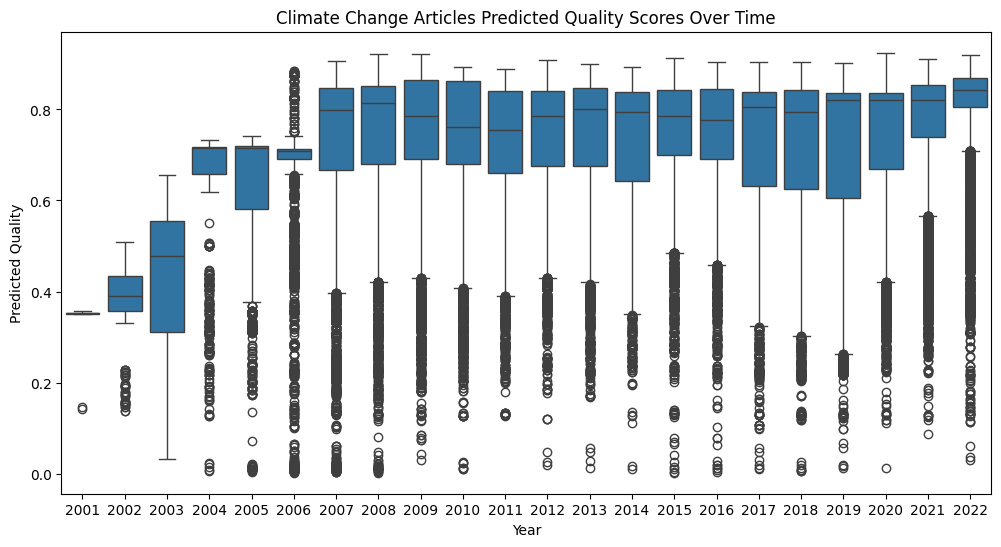

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


# Filter the DataFrame for articles related to climate change.
climate_change_df = df_total[df_total['page_title'].str.contains("climate_change", case=False, na=False)]
#climate_change_df = df_total[df_total['page_title'] == 'Climate_change']

# Convert the 'timestamp' or 'year' column to a datetime object if not already done.
climate_change_df_copy = climate_change_df.copy()


# Convert the 'revision_timestamp' column to datetime
climate_change_df_copy.loc[:, 'timestamp'] = pd.to_datetime(climate_change_df_copy['revision_timestamp'])

# Extract the year from the 'timestamp' column
climate_change_df_copy.loc[:, 'year'] = climate_change_df_copy['timestamp'].dt.year


# Create a boxplot with Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='pred_qual', data=climate_change_df_copy)
plt.title('Climate Change Articles Predicted Quality Scores Over Time')
plt.xlabel('Year')
plt.ylabel('Predicted Quality')
plt.show()

/tmp/ipykernel_110/3147074400.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  climate_change_df_copy.loc[:, 'year_month'] = climate_change_df_copy['timestamp'].dt.to_period('M')


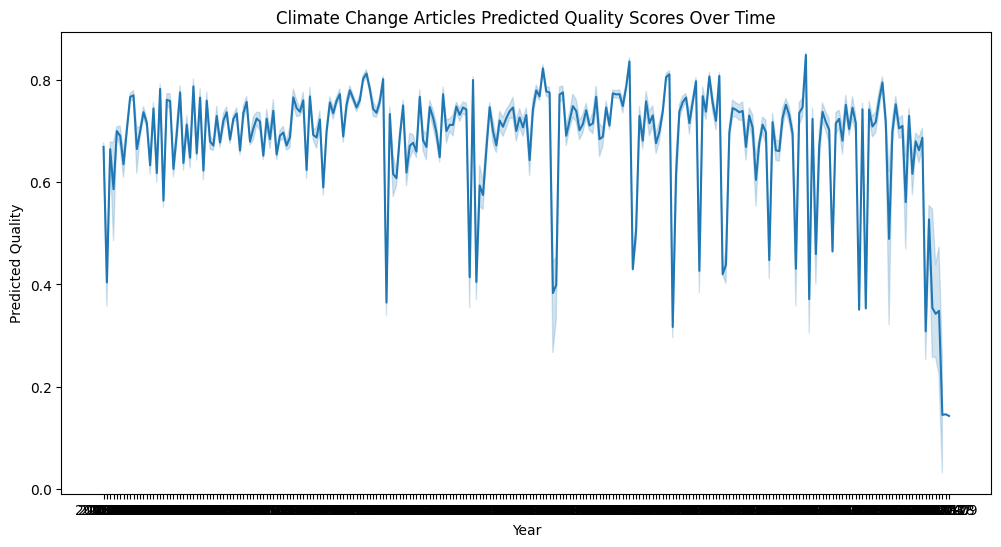

In [39]:
# Extract year and month from the 'timestamp' column
climate_change_df_copy.loc[:, 'year_month'] = climate_change_df_copy['timestamp'].dt.to_period('M')
climate_change_df_copy['year_month_str'] = climate_change_df_copy['year_month'].astype(str)

# Create a boxplot with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month_str', y='pred_qual', data=climate_change_df_copy)
plt.title('Climate Change Articles Predicted Quality Scores Over Time')
plt.xlabel('Year')
plt.ylabel('Predicted Quality')
plt.show()

/tmp/ipykernel_110/2398241262.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  climate_change_df_copy['quarter'] = climate_change_df_copy['timestamp'].dt.to_period('Q')


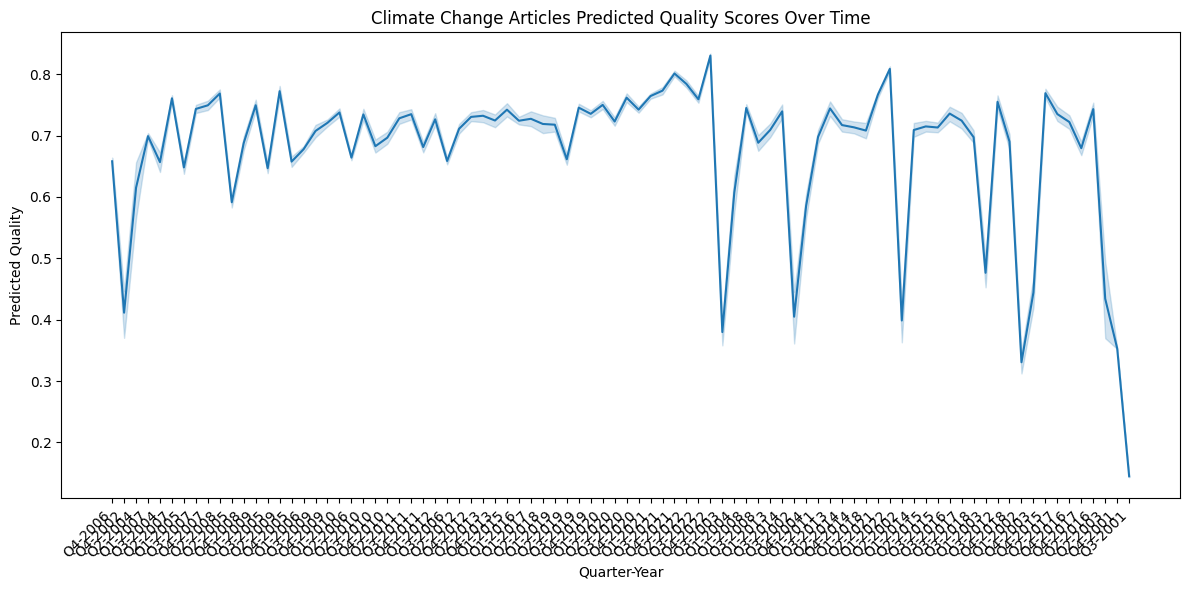

In [43]:
# show each quarter data

climate_change_df_copy['quarter'] = climate_change_df_copy['timestamp'].dt.to_period('Q')

# Create a new column for quarter strings for plotting
climate_change_df_copy['quarter_str'] = climate_change_df_copy['quarter'].dt.strftime('Q%q-%Y')

# Now plot using the quarters
plt.figure(figsize=(12, 6))
plot = sns.lineplot(x='quarter_str', y='pred_qual', data=climate_change_df_copy)
plt.title('Climate Change Articles Predicted Quality Scores Over Time')
plt.xlabel('Quarter-Year')
plt.ylabel('Predicted Quality')

# Set the x-ticks to show every quarter by using unique quarter values
quarter_ticks = climate_change_df_copy['quarter_str'].unique()
plot.set_xticks(quarter_ticks)

# Rotate x-labels to avoid overlap
plot.set_xticklabels(quarter_ticks, rotation=45, ha='right')

plt.tight_layout()
plt.show()


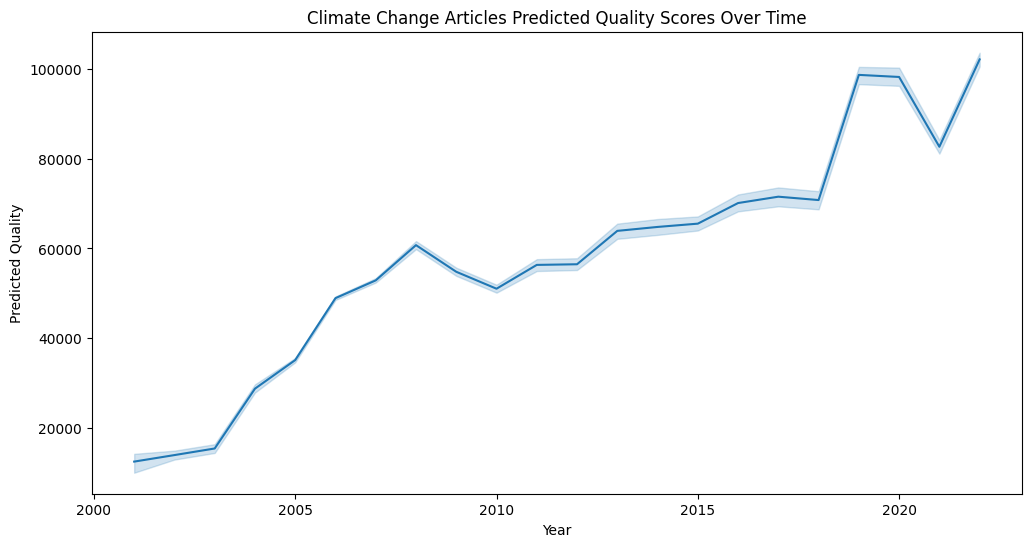

In [21]:
# Create a lineplot page_length with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='page_length', data=climate_change_df_copy)
plt.title('Climate Change Articles Page-length Over Time')
plt.xlabel('Year')
plt.ylabel('Page Length')
plt.show()

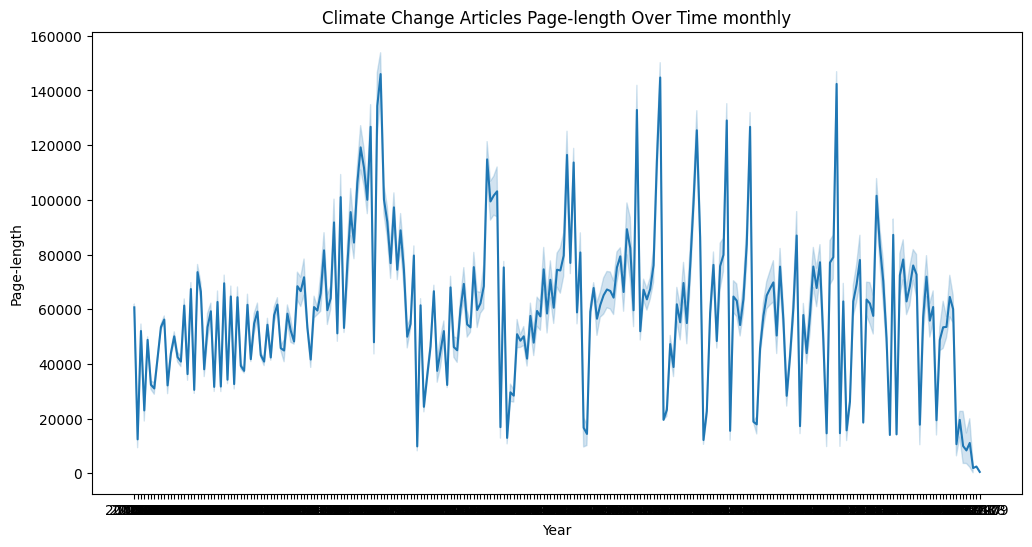

In [40]:
# Create a page_length lineplot monthly with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month_str', y='page_length', data=climate_change_df_copy)
plt.title('Climate Change Articles Page-length Over Time monthly')
plt.xlabel('Year')
plt.ylabel('Page-length')
plt.show()

## The trade-offs between longer vs. shorter granularities

In the yearly chart, it smooths out short-term fluctuations and trends. This can be advantageous when we want to see long-term trends without getting distracted by short-term variations. However, the trade-off is that we might miss important short-term variations and seasonal effects that could be crucial for understanding the underlying processes. 

On the other hand, the monthly chart provides a granular view that highlights short-term trends and variations. This can be particularly useful for analysts who need to understand the dynamics of the data on a finer scale. It can reveal insights such as seasonal effects, response to specific events, and short-term impacts of interventions.
The downside is the potential for overinterpretation of minor fluctuations, which may be just noise rather than meaningful trends. The monthly chart also presents more complexity, making it harder to visually extract long-term trends and can lead to a cluttered or overwhelming presentation for someone not used to dealing with data.

## 3. Future Analyses

# TODO: Describe what additional patterns you might want to explore and visualize in the data (and why). You don't know have to know how to do the analyses.

### 1, Variety in Subject Matter
Observing the frequency of new subject introductions compared to the expansion of existing ones might shed light on the breadth of Wikipedia's content spectrum.
### 2, Analysis of Article Composition
Investigating the variations in article length, complexity, and clarity over periods could offer clues about the evolving editorial practices on Wikipedia.
### 3, Progression of Subject Areas Over Time
Tracking the advancement of areas like technology, health care, or public policy can reveal shifts in the public's attention and the aggregate buildup of knowledge.
### 4, Influence of Recent Events
Examining the impact of critical current events on the initiation and updating of entries may highlight Wikipedia's function as both a timely and historical record of information.